### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m)
print("The dimension of the matrix is:",m.ndim)
print("The number of rows and columns are:",m.shape)
print("The number of the elements are:",len(m))
print("Each element contains",len(m[1]),"numbers")
print("Mean is: ",np.mean(m))



[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
The dimension of the matrix is: 2
The number of rows and columns are: (3, 4)
The number of the elements are: 3
Each element contains 4 numbers
Mean is:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [13]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
result=np.outer(u,v)
print(result)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [17]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print(np.array([u[j]*v[i] for j in range(4) for i in range(4)]).reshape(4,4))


[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [27]:
x=np.tile(u,(1))
y=np.tile(v,(1))
x_y=np.outer(x,y)
print(x_y)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [20]:
import numpy as np
m=0.1*np.random.random_sample((10,6))
print(m)
print(len(m))

[[0.04936841 0.08952024 0.00753036 0.0981351  0.09666698 0.04141893]
 [0.03701348 0.03256665 0.04786073 0.04050965 0.01743215 0.08565065]
 [0.01795518 0.03246107 0.02311969 0.02086484 0.02305238 0.06940972]
 [0.06733677 0.03770327 0.02809749 0.08107032 0.05091324 0.02019198]
 [0.01148729 0.07666973 0.05498609 0.00250145 0.01045703 0.07119335]
 [0.07557476 0.00357466 0.0865266  0.0866291  0.03870265 0.05531075]
 [0.00755281 0.00763805 0.01169255 0.0984926  0.05743184 0.04313892]
 [0.0857216  0.05757152 0.05312213 0.04067074 0.03019818 0.06805477]
 [0.0296601  0.09693444 0.01502804 0.02811482 0.05426207 0.05377601]
 [0.09109824 0.02105651 0.0959742  0.0305522  0.08983574 0.09329191]]
10


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [21]:
from math import pi
a=np.linspace(0,2*pi,100)
print(a)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

In [29]:
#each 10 argument
a=np.linspace(0,2*pi,100)
for i in range(1,10):
    print(a[10*i-1])

0.5711986642890533
1.2058638468324459
1.8405290293758385
2.475194211919231
3.1098593944626236
3.744524577006016
4.3791897595494085
5.013854942092801
5.648520124636194


In [31]:
#reversing
print(a[::-1])

[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.26933037 1.20586385 1.14239733 1.07893081 1.01546429
 0.95199777 0.88853126 0.82506474 0.76159822 0.6981317  0.634665

In [36]:
# sin and cos difference
for i in a:
    if abs(np.sin(i)-np.cos(i))<0.1 :
        print(i)
        

0.7615982190520711
0.8250647373064104
3.8714576135146945
3.934924131769034


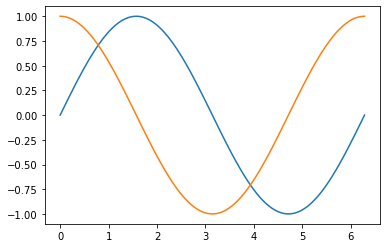

In [25]:
#plot
import matplotlib.pyplot as plt
%matplotlib inline
xs=np.linspace(0,2*pi,100)
ys=np.sin(xs)
zs=np.cos(xs)
plt.plot(xs,ys);
plt.plot(xs,zs);


5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [11]:
a1=np.arange(1,11)
a2=np.arange(1,11)
b=np.outer(a1,a2)
print(b)


[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


In [8]:
#trace
matrix_trace=sum(np.diag(np.outer(a1,a2)))
print("The trace of our matrix is: ",matrix_trace)

The trace of our matrix is:  385


In [17]:
#anto-diagonal
arr=np.array(b)
print(np.fliplr(arr).diagonal())

[10 18 24 28 30 30 28 24 18 10]


In [19]:
#diagonal offset by 1 upwards
np.diag(b,k=1)


array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

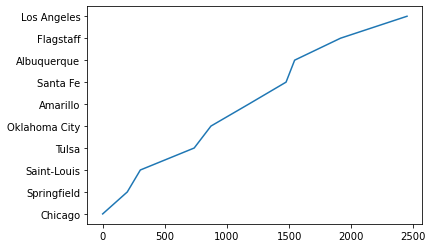

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

xs=np.array([0,198,303,736,871,1175,1475,1544,1913,2448])
ys=np.array(['Chicago','Springfield','Saint-Louis','Tulsa','Oklahoma City','Amarillo','Santa Fe','Albuquerque','Flagstaff','Los Angeles'])
plt.plot(xs,ys)

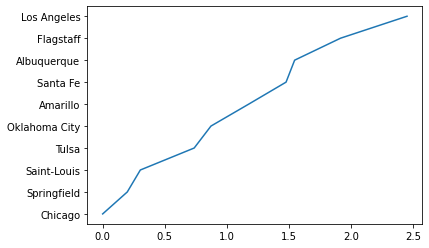

In [23]:
#in km
xs=(10**-3)*np.array([0,198,303,736,871,1175,1475,1544,1913,2448])
ys=np.array(['Chicago','Springfield','Saint-Louis','Tulsa','Oklahoma City','Amarillo','Santa Fe','Albuquerque','Flagstaff','Los Angeles'])
plt.plot(xs,ys)

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [5]:
def SieveOfEratosthenes(n): 
    prime = [True for i in range(n + 1)] 
    p = 2
    while (p * p <= n): 
        if (prime[p] == True): 
            for i in range(p * 2, n + 1, p): 
                prime[i] = False
        p += 1
    prime[0]= False
    prime[1]= False
    for p in range(n + 1): 
        if prime[p]: 
            print(p), 
  

    if __name__=='__main__': 
        n = 99
        print("The prime numbers smaller or equal to",n)   
SieveOfEratosthenes(99) 
print(np.array(SieveOfEratosthenes(99),dtype=bool))


2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
The prime numbers smaller or equal to 99
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
The prime numbers smaller or equal to 99
False


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [19]:
walkers=1000
steps=200
from numpy import random
np.random.randint(-1,1,size=(100,10))

array([[-1, -1,  0,  0, -1,  0, -1,  0, -1,  0],
       [ 0,  0,  0, -1, -1, -1,  0, -1,  0, -1],
       [-1, -1, -1, -1,  0,  0,  0, -1, -1, -1],
       [-1,  0, -1, -1,  0,  0, -1, -1, -1,  0],
       [-1, -1,  0,  0,  0,  0, -1,  0,  0,  0],
       [-1, -1,  0,  0, -1,  0, -1, -1, -1, -1],
       [ 0,  0,  0, -1,  0,  0,  0, -1,  0, -1],
       [-1, -1, -1,  0,  0,  0,  0, -1,  0,  0],
       [ 0, -1, -1,  0, -1, -1, -1,  0, -1, -1],
       [-1, -1, -1, -1,  0,  0,  0,  0,  0, -1],
       [-1, -1,  0, -1,  0, -1,  0,  0, -1,  0],
       [ 0, -1, -1, -1, -1,  0, -1,  0, -1, -1],
       [ 0, -1, -1,  0, -1, -1, -1,  0, -1, -1],
       [ 0, -1, -1,  0, -1,  0,  0,  0, -1,  0],
       [-1, -1, -1, -1,  0,  0, -1, -1,  0, -1],
       [-1, -1, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0, -1, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0, -1],
       [-1,  0,  0,  0, -1,  0, -1,  0,  0,  0],
       [ 0, -1, -1, -1, -1,  0, -1,  0,  0, -1],
       [ 0,  0,  0, 

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


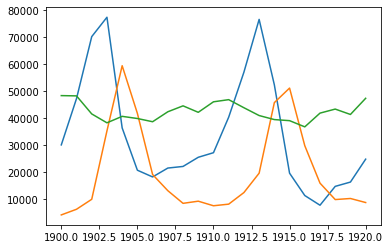

In [33]:
import numpy as np
import matplotlib.pyplot as plt
population=np.loadtxt('C:\\Users\\pccom\\populations.txt')
years=population[:,0]
hare=population[:,1]
lynx=population[:,2]
carrots=population[:,3]
plt.plot(years,hare,label='hare')
plt.plot(years,lynx,label='lynx')
plt.plot(years,carrots,label='carrots')
print(population)


In [38]:
#statistical properties
#mean
print("Mean of the hare is: ",np.mean(hare))
print("Mean of the lynx is: ",np.mean(lynx))
print("Mean of the carrots is: ",np.mean(carrots))
#std
print("std of hare: ",np.std(hare))
print("std of lynx: ",np.std(lynx))
print("std of carrots: ",np.std(carrots))
#correlation
print(np.corrcoef(population))


Mean of the hare is:  34080.95238095238
Mean of the lynx is:  20166.666666666668
Mean of the carrots is:  42400.0
std of hare:  20897.906458089667
std of lynx:  16254.591536908763
std of carrots:  3322.5062255844787
[[1.         0.94670427 0.7453805  0.53293502 0.23921421 0.41895709
  0.85283015 0.95425832 0.98051108 0.99070716 0.99590369 0.97244531
  0.84380146 0.66804435 0.48273748 0.22820667 0.51948972 0.76705229
  0.92150249 0.93778113 0.98615283]
 [0.94670427 1.         0.92035994 0.75318636 0.25497852 0.32466216
  0.7268982  0.84872675 0.87731729 0.92518284 0.92808384 0.99390766
  0.96975686 0.86859965 0.61251621 0.14170298 0.34950737 0.55218411
  0.76071409 0.79411842 0.89353024]
 [0.7453805  0.92035994 1.         0.91513143 0.24657749 0.17178696
  0.47353001 0.60050099 0.62656117 0.71336987 0.71256608 0.8769956
  0.98343945 0.9878796  0.68863405 0.02532081 0.0997558  0.21500902
  0.45744126 0.50695133 0.65319893]
 [0.53293502 0.75318636 0.91513143 1.         0.53083474 0.355725